In [2]:
import pandas as pd
import numpy as np
train = pd.read_csv('features2.csv')
train.head(5)

,AdoptionSpeed,MaturitySize,FurLength,Dewormed,Vaccinated,Sterilized,Health,Fee,Age,NameCounts,Named
0,2,1,1,2,2,2,1,100,3,1,1
1,0,2,2,3,3,3,1,0,1,0,0
2,3,2,2,1,1,2,1,0,1,1,1
3,2,2,1,1,1,2,1,150,4,11,1
4,2,2,1,2,2,2,1,0,1,5,1


In [3]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder


train, y = train.iloc[:,1:],train.iloc[:,0]


X = train

train.head(3)



,MaturitySize,FurLength,Dewormed,Vaccinated,Sterilized,Health,Fee,Age,NameCounts,Named
0,1,1,2,2,2,1,100,3,1,1
1,2,2,3,3,3,1,0,1,0,0
2,2,2,1,1,2,1,0,1,1,1


In [4]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [6]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [7]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

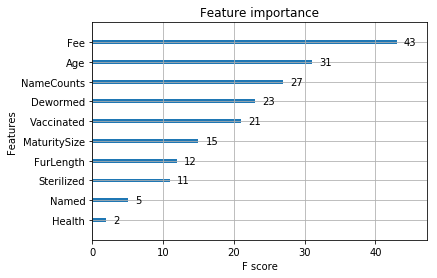

In [35]:
import matplotlib.pyplot as plt 
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

reg = lr.fit(X_train['Fee'].values.reshape(-1,1),y_train)

In [34]:
reg.coef_
reg.predict([[0],[50],[1000]])

array([2.51508309, 2.51289514, 2.47132418])

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

reg = lr.fit(X_train['Named'].values.reshape(-1,1),y_train)

In [22]:
reg.coef_

array([-0.08777394])

In [29]:
reg.predict([[0]])

array([2.5928])